# Exploratory Data Analysis (EDA) Report: Patient Admissions and Treatment Outcomes
## 1. Objective:
The primary goal of this EDA project is to explore and uncover patterns, trends, and relationships within a dataset containing patient admission information. The analysis focuses on understanding various factors such as Diagnosis, Treatment Outcome, Age Distribution, Readmission Rates, Stay Duration, and Admission Trends. The visualizations aim to highlight actionable insights that can inform healthcare decision-making, treatment optimization, and resource planning.

## 2. Data Cleaning & Preprocessing

### 2.1 Importing Libraries and Dataset

The dataset is loaded using pandas, and essential libraries such as NumPy, Matplotlib, and Seaborn are used for data manipulation and visualization.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\ank30\OneDrive\Projects\Project1\Healthcare.csv')

In [6]:
df.head()

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission
0,1,62,Female,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No
1,2,65,Male,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No
2,3,82,Female,2023-03-20,2023-03-21,Pneumonia,Recovered,No
3,4,85,Male,2023-03-13,2023-03-22,Heart Attack,Improved,No
4,5,85,Female,2023-03-27,2023-04-02,Appendicitis,No Change,No


### 2.2 Handling Missing Values

The dataset is checked for missing values, and necessary imputation or removal of rows/columns is performed to maintain data integrity.

Columns with excessive missing data may be dropped or filled using appropriate statistical methods.

In [8]:
df.isnull().sum()

Patient ID           0
Age                  0
Gender               0
Admission Date       0
Discharge Date       0
Diagnosis            0
Treatment Outcome    0
Readmission          0
dtype: int64

### 2.3 Data Type Conversion and adding new columns

Data types of each column are examined and converted where necessary (e.g., converting date columns to DateTime format).

New columns are added for ease of analysis

In [10]:
df.dtypes

Patient ID            int64
Age                   int64
Gender               object
Admission Date       object
Discharge Date       object
Diagnosis            object
Treatment Outcome    object
Readmission          object
dtype: object

In [11]:
df['Admission Date']= pd.to_datetime(df['Admission Date'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])

In [12]:
df.dtypes

Patient ID                    int64
Age                           int64
Gender                       object
Admission Date       datetime64[ns]
Discharge Date       datetime64[ns]
Diagnosis                    object
Treatment Outcome            object
Readmission                  object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient ID         100 non-null    int64         
 1   Age                100 non-null    int64         
 2   Gender             100 non-null    object        
 3   Admission Date     100 non-null    datetime64[ns]
 4   Discharge Date     100 non-null    datetime64[ns]
 5   Diagnosis          100 non-null    object        
 6   Treatment Outcome  100 non-null    object        
 7   Readmission        100 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.4+ KB


In [14]:
df.describe()

,Patient ID,Age,Admission Date,Discharge Date
count,100.000000,100.000000,100,100
mean,50.500000,52.430000,2023-03-16 03:07:12,2023-03-23 12:57:36
min,1.000000,18.000000,2023-03-01 00:00:00,2023-03-03 00:00:00
25%,25.750000,37.000000,2023-03-07 18:00:00,2023-03-15 00:00:00
50%,50.500000,53.000000,2023-03-18 00:00:00,2023-03-24 00:00:00
75%,75.250000,67.250000,2023-03-24 00:00:00,2023-04-01 00:00:00
max,100.000000,88.000000,2023-03-30 00:00:00,2023-04-09 00:00:00
std,29.011492,20.375394,NaN,NaN


In [15]:
bins = [0, 18, 60, 120]
labels = ['Child', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins= bins, labels=labels, right=False)

## 3. Exploratory Data Analysis (EDA)

 ### 3.1 Gender Distribution of Patients

A pie plot of thr gender distribution shoes that the number of males is slightly higher than the number for females admitted


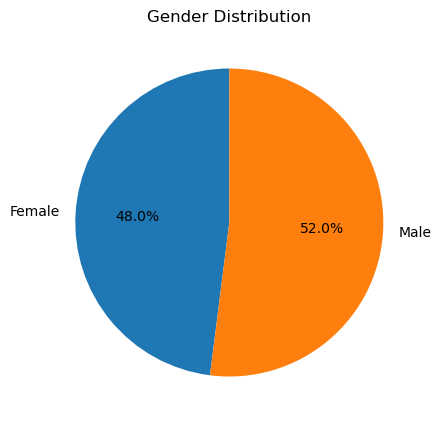

In [17]:
gender_count = df.groupby(df['Gender'])['Patient ID'].count()

plt.figure(figsize=(10, 5))
plt.pie(gender_count, labels= gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

### 3.2 Age Distribution of Patients

A pie plot of age distribution shows that more than 60% of patients admitted were Adults and teh rest being Seniors. The hospital did not have any child admissions.

A box plot of the age distribution reveals almost uniform distriction as all four quartiles are almost same.

An age distribution histogram shows that most patients were in tehir 30s, 50s, 60s and 80s

C:\Users\ank30\AppData\Local\Temp\ipykernel_32856\1539637955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_count = df.groupby(df['Age Group'])['Patient ID'].count()


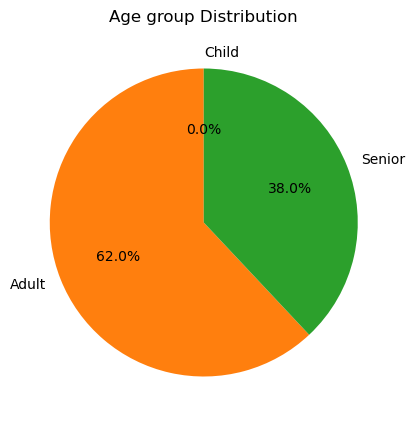

In [19]:
gender_count = df.groupby(df['Age Group'])['Patient ID'].count()

plt.figure(figsize=(10, 5))
plt.pie(gender_count, labels= gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Age group Distribution")
plt.show()

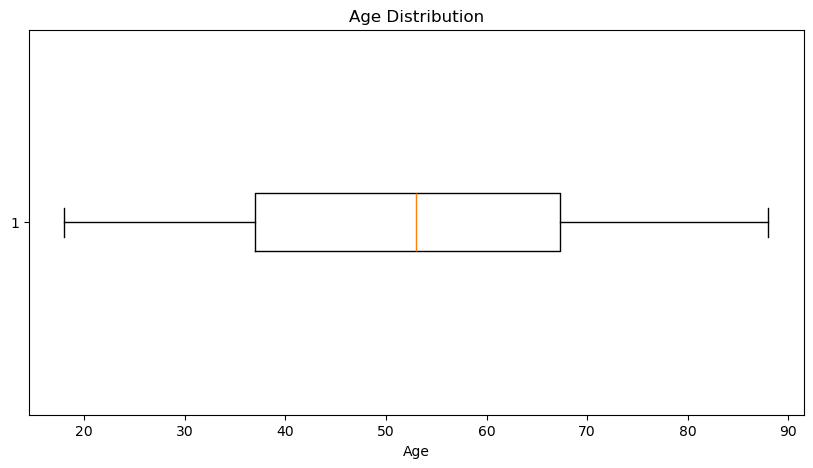

In [20]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['Age'], vert=False)  # ✅ Use raw age values
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

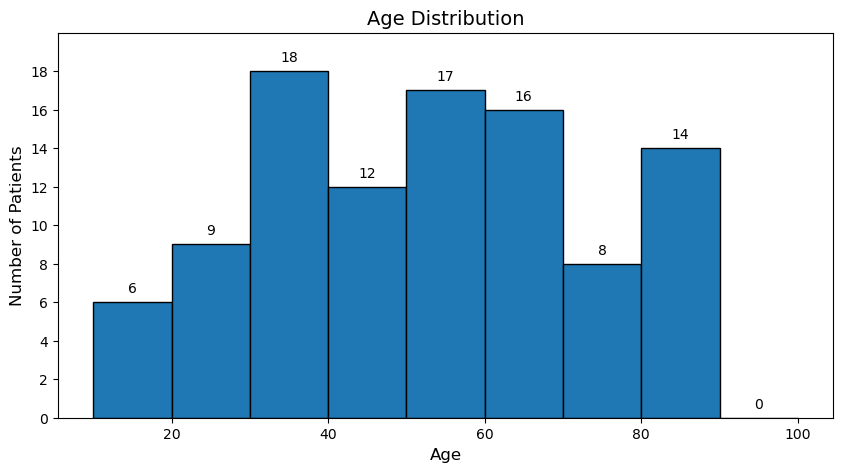

In [21]:
custom_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(10, 5))

counts, bins, patches = plt.hist(df['Age'], bins=custom_bins, edgecolor='black')

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count + 0.5,  
             str(int(count)), 
             ha='center', fontsize=10, color='black')

plt.yticks(np.arange(0, max(counts)+2, 2))
plt.ylim(0, counts.max() + 2) 
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Age Distribution", fontsize=14)
plt.show()

### 3.3 Admission Trends Over Time

A time series graph is used to track patient admissions over days.

A line chart of number of patients admitted everyday shows no particular trend.


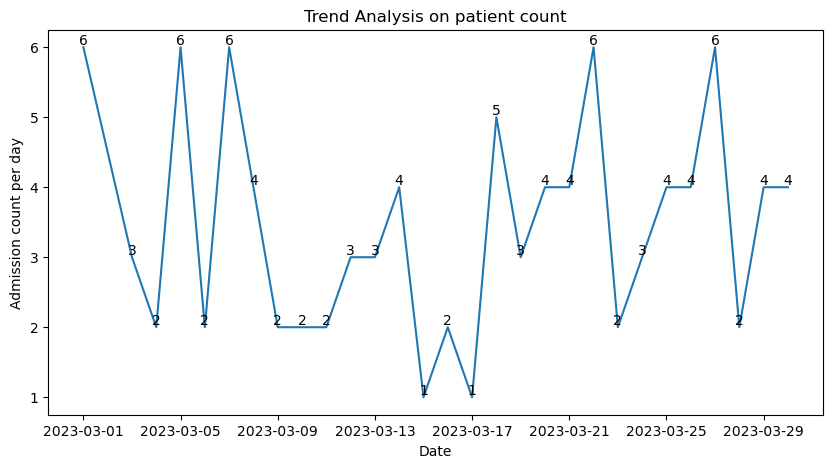

In [23]:
Admission_count = df.groupby('Admission Date')['Patient ID'].count()

plt.figure(figsize=(10, 5))
plt.plot(Admission_count.index, Admission_count)

for x, y in zip(Admission_count.index, Admission_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')
    
plt.xlabel('Date')
plt.ylabel('Admission count per day')
plt.title('Trend Analysis on patient count')
plt.show()

### 3.4 Length of Hospital Stay

A bar graph analyses the distribution of hospital stay duration. It is observed that most patients are hospitalized for 6-10 days.

A trend analysis shows that most patients were hospitalized on a wednesday

In [25]:
df['Stay Days'] = df['Discharge Date']-df['Admission Date']

In [26]:
df.head()

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission,Age Group,Stay Days
0,1,62,Female,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No,Senior,14 days
1,2,65,Male,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No,Senior,6 days
2,3,82,Female,2023-03-20,2023-03-21,Pneumonia,Recovered,No,Senior,1 days
3,4,85,Male,2023-03-13,2023-03-22,Heart Attack,Improved,No,Senior,9 days
4,5,85,Female,2023-03-27,2023-04-02,Appendicitis,No Change,No,Senior,6 days


In [27]:
df.dtypes

Patient ID                     int64
Age                            int64
Gender                        object
Admission Date        datetime64[ns]
Discharge Date        datetime64[ns]
Diagnosis                     object
Treatment Outcome             object
Readmission                   object
Age Group                   category
Stay Days            timedelta64[ns]
dtype: object

In [28]:
df['Stay Days'] = df['Stay Days'].dt.days
df.head()

,Patient ID,Age,Gender,Admission Date,Discharge Date,Diagnosis,Treatment Outcome,Readmission,Age Group,Stay Days
0,1,62,Female,2023-03-18,2023-04-01,Pneumonia,Deteriorated,No,Senior,14
1,2,65,Male,2023-03-20,2023-03-26,Breast Cancer,Deteriorated,No,Senior,6
2,3,82,Female,2023-03-20,2023-03-21,Pneumonia,Recovered,No,Senior,1
3,4,85,Male,2023-03-13,2023-03-22,Heart Attack,Improved,No,Senior,9
4,5,85,Female,2023-03-27,2023-04-02,Appendicitis,No Change,No,Senior,6


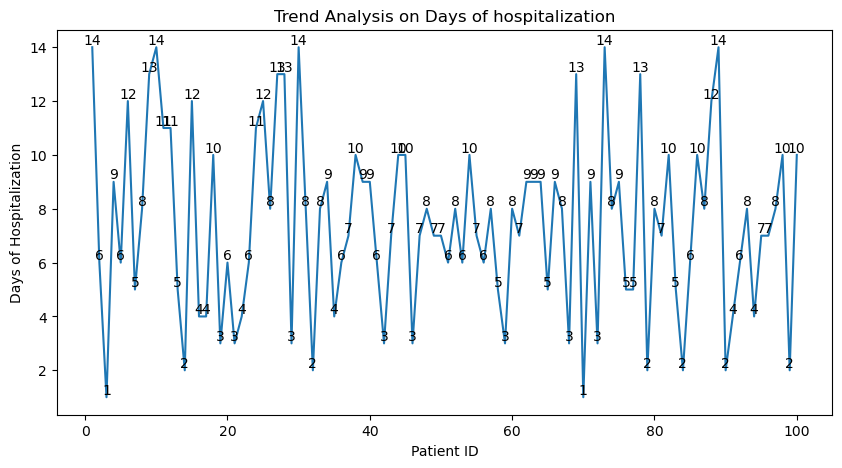

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df['Patient ID'], df['Stay Days'])

for x, y in zip(df['Patient ID'], df['Stay Days']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Patient ID')
plt.ylabel('Days of Hospitalization')
plt.title('Trend Analysis on Days of hospitalization')
plt.show()

C:\Users\ank30\AppData\Local\Temp\ipykernel_32856\3930146210.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of the Week', y='Admission Count', data=admission_count, palette='Blues')


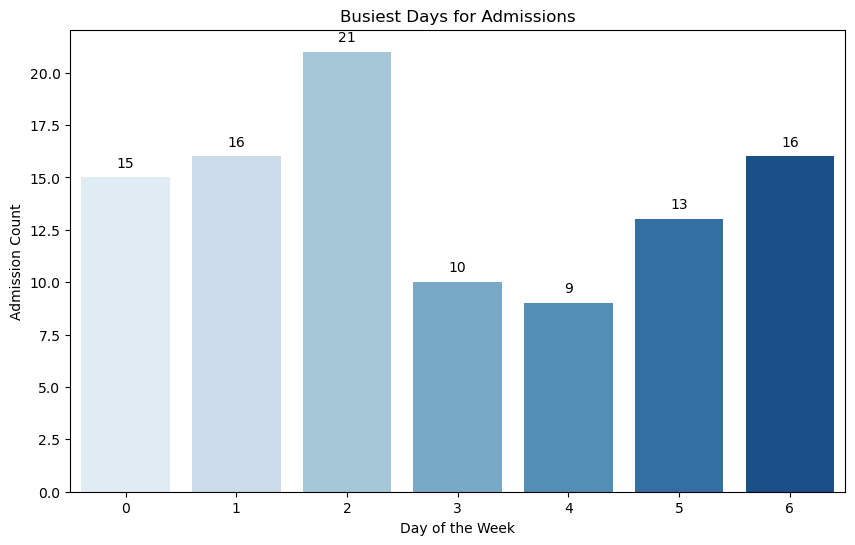

In [30]:
df['Day of the Week'] = df['Admission Date'].dt.dayofweek

admission_count = df.groupby('Day of the Week').size().reset_index(name='Admission Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the Week', y='Admission Count', data=admission_count, palette='Blues')

for i, row in admission_count.iterrows():
    plt.text(i, row['Admission Count'] + 0.5, row['Admission Count'], ha='center', fontsize=10, color='black')


plt.xlabel('Day of the Week')
plt.ylabel('Admission Count')
plt.title('Busiest Days for Admissions')
plt.show()

C:\Users\ank30\AppData\Local\Temp\ipykernel_32856\898697166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stay = df.groupby('Age Group')['Stay Days'].mean().dropna()


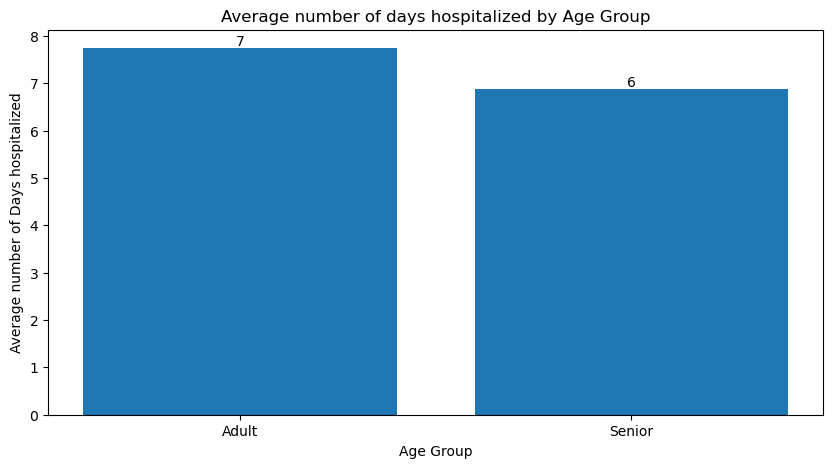

In [31]:
age_group_stay = df.groupby('Age Group')['Stay Days'].mean().dropna()

plt.figure(figsize=(10, 5))
plt.bar(age_group_stay.index, age_group_stay.values)

for x, y in zip(age_group_stay.index, age_group_stay.values):
    plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Age Group')
plt.ylabel('Average number of Days hospitalized')
plt.title('Average number of days hospitalized by Age Group')
plt.show()

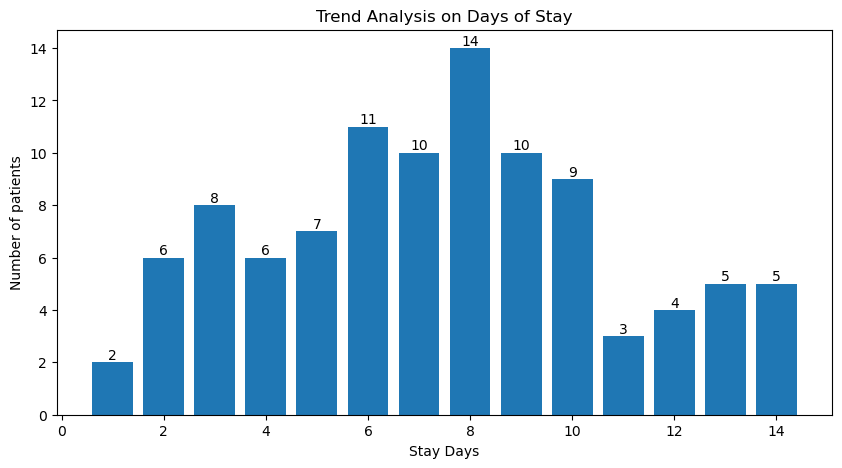

In [32]:
Stay_days_frequency = df.groupby('Stay Days')['Patient ID'].count()

plt.figure(figsize=(10, 5))
plt.bar(Stay_days_frequency.index, Stay_days_frequency )

for x, y in zip(Stay_days_frequency.index, Stay_days_frequency):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Stay Days')
plt.ylabel('Number of patients')
plt.title('Trend Analysis on Days of Stay')
plt.show()

## 3.5 Diagnosis Distribution

A bar chart is used to display the frequency of various diagnoses. It is observed that highest number of patients were hospitalized for Breast Cancer, whereas Appendicitis and heart attack had the second highest frequency

A clustered bar graph reveals that same pattern is followed in age groups as well with both adult and senior age groups having being admitted most for breast cancer followed by Appendicitis and heart attack.

The average number of days for hospitalization however was higher for fracture than any other disease.

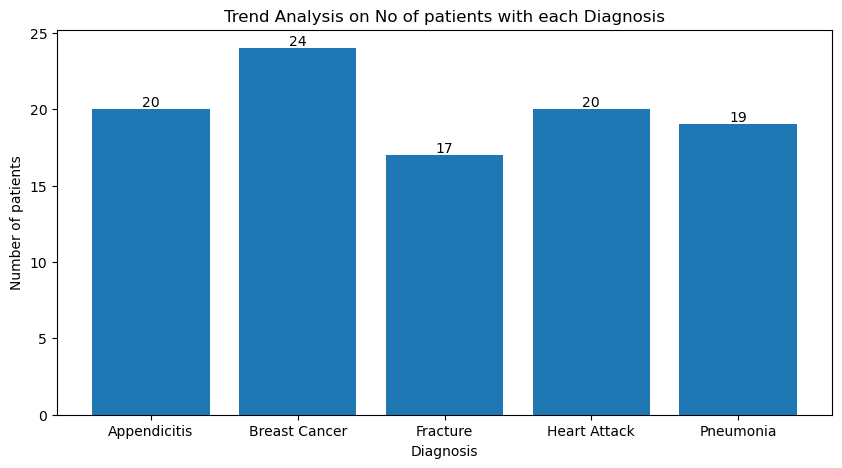

In [34]:
diagnosis_frequency = df.groupby('Diagnosis')['Patient ID'].count()

plt.figure(figsize=(10, 5))
plt.bar(diagnosis_frequency.index, diagnosis_frequency.values)

for x, y in zip(diagnosis_frequency.index, diagnosis_frequency.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Diagnosis')
plt.ylabel('Number of patients')
plt.title('Trend Analysis on No of patients with each Diagnosis')
plt.show()

C:\Users\ank30\AppData\Local\Temp\ipykernel_32856\3719390406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diagnosis_agegroup = df.groupby(['Diagnosis', 'Age Group']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

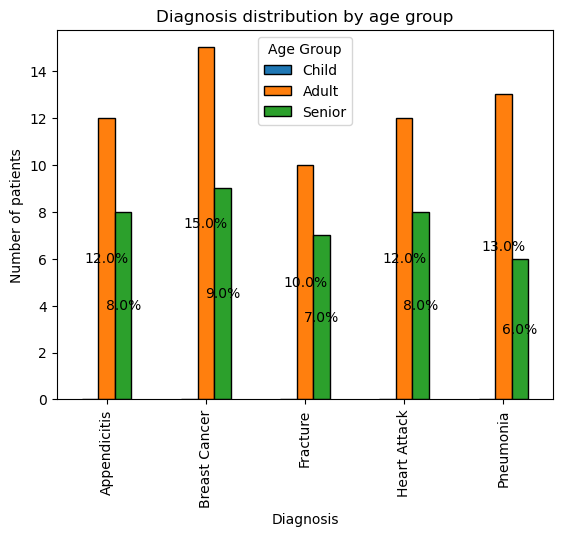

In [35]:
diagnosis_agegroup = df.groupby(['Diagnosis', 'Age Group']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
diagnosis_agegroup.plot(kind='bar', stacked=False, edgecolor='black')

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                 f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Diagnosis')
plt.ylabel('Number of patients')
plt.title('Diagnosis distribution by age group')
plt.show()

In [36]:
diagnosis_age_stay = df.groupby(['Diagnosis', 'Age Group'])['Stay Days'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
bars = diagnosis_age_stay.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 6), ax=ax)

for container in ax.containers:  
    for bar in container:  
        if bar.get_height() > 0: o
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                bar.get_y() + bar.get_height() / 2, 
                f"{bar.get_height():.1f}",  
                ha='center', va='center', fontsize=9, color='black'
            )

plt.xlabel('Diagnosis')
plt.ylabel('Average Number of Days Hospitalized')
plt.title('Average Number of Days Hospitalized per Diagnosis (Grouped by Age Group)')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Age Group')
plt.show()

IndentationError: unexpected indent (2406062780.py, line 9)

## 3.6 Treatment Outcome Analysis

A categorical breakdown of treatment outcomes (e.g., "Recovered," "Transferred," "Deceased") is visualized. ]

It revealed that treatment wa snot effective in most breast cancer patients. Breast cancer also showed the highest number of deterioration. 
Deteriration was not seen in patients with fracture but majority of them did not show any improvement too.
The treatment for Heart attack was most effective than any other dieases and highest number of patients hsowed improvement. 
Most patients with penumonia recovered.

A heatmap visualises the same data with values.

In [ ]:
outcome_counts = df.groupby(['Diagnosis', 'Treatment Outcome']).size().unstack(fill_value=0)

colors = sns.color_palette("Set2", n_colors=4)
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Treatment Outcome Analysis: Diagnosis vs. Treatment Outcome')
plt.show()

In [ ]:
heatmap_data = pd.crosstab(df['Diagnosis'], df['Treatment Outcome'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar=False)

plt.xlabel('Treatment Outcome')
plt.ylabel('Diagnosis')
plt.title('Heatmap of Diagnosis vs Treatment Outcome')
plt.show()

### 3.7 Readmission Rates

A bar chart tracks readmission counts over time. It revealed that readmission rate was highest for breat cancer patients followed by fracture and heart attack.

Readmission rate was also higher for seniors than compared to adults

In [ ]:
readmission_rate = df.groupby('Diagnosis')['Readmission'].value_counts(normalize=True).unstack()

readmission_rate = readmission_rate['Yes'] * 100

plt.figure(figsize=(10, 6))
readmission_rate.plot(kind='bar', color='skyblue', edgecolor='black')

for i, value in enumerate(readmission_rate):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0, readmission_rate.max() + 5) 
plt.xlabel('Diagnosis')
plt.ylabel('Readmission Rate (%)')
plt.title('Readmission Rate by Diagnosis')
plt.show()

In [ ]:
readmission_rate = df.groupby(['Age Group', 'Readmission']).size().unstack(fill_value=0)

readmission_rate = readmission_rate.div(readmission_rate.sum(axis=1), axis=0) * 100


plt.figure(figsize=(10, 6))
readmission_rate.plot(kind='bar', stacked=False, color=['#ff9999', '#66b3ff'], edgecolor='black')

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                 f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.title('Readmission Rate by Age Group')
plt.show()

## 4. Conclusion
This analysis provides valuable insights into patient admissions, treatment outcomes, and hospital resource utilization. The key findings show that:

Older patients those with pneumonia tend to have longer hospital stays where as older patients tend have higher readmission rates in general.

Patients with breats cancer, fracture and heart attack are at the highest risk of being readmitted.

These insights highlight the need for better preventive care strategies, especially for high-risk patients. Hospitals can improve patient outcomes by:

Implementing stronger post-discharge monitoring for at-risk individuals.

Allocating more resources during peak admission seasons to manage patient flow.

Exploring predictive models to identify high-risk patients early and provide targeted care.

By applying these strategies, hospitals can enhance patient care, reduce readmissions, and improve overall healthcare efficiency.